# The Cultural Heritage and the Gastronomic Culture of Emilia Romagna: a summary analysis.

I think the aspects of art history that interest me the most, such as curatorial or museographer, are not related to data analysis but more to the physical experience within cultural institutions. However, one path I have always thought of pursuing, and not far from what I am passionate about, is that of cultural heritage (conservation, maintenance, valorisation, etc.).
In this notebook, I will analyse a dataset showing the cultural places in the region in Italy from which I come. 

### Foregoing - Before we start

I imported all the pyhton libraries that might be useful.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

I changed the pandas display parameter, as in some cases is useful to have a full view of what you're working with.

In [14]:
pd.set_option('display.max_rows', None)

### Read the file into a pd.DataFrame

In [54]:
EM_ArteCultura = pd.read_csv('/Users/lisaraulli/Downloads/Regione-Emilia-Romagna---Arte-e-cultura.csv', 
                             sep=';', quotechar='"', encoding="ISO-8859-1") #engine='python', on_bad_lines='skip'

It is not always easy and straightforward. Indeed, the exploration of this dataset began with figuring out how to open it effectively using pandas. First I had to specify which characters were used as delimiters, the ';' instead of the ',', and as quotations, in addition the UTF-8 encoding seemed not to work and that is why I used encoding='ISO-8859-1'. In commentary I left two other parameters I came across for troubleshooting which proved useful in some cases.

In [16]:
EM_ArteCultura.head(5)

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Sottofamiglia,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
0,AGAZZANO,PIACENZA,ROCCA e CASTELLO di AGAZZANO,Complesso fortificato in cui l'austerità medio...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ROCCA e CASTELLO di AGAZZANO,"CASTELLI, TORRI, CAMPANILI",via del Castello - Agazzano (PC),NaN,Piacenza,42184,44.947254,9.522221
1,AGAZZANO,PIACENZA,SANTUARIO DI NOSTRA SIGNORA DEL PILASTRELLO,"Situato in territorio di Agazzano, sulle rive ...",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,SANTUARIO DI NOSTRA SIGNORA DEL PILASTRELLO,"ABBAZIE, MONASTERI, SANTUARI",località Pilastrello - Agazzano (PC),NaN,Piacenza,42184,44.942363,9.527886
2,ALSENO,PIACENZA,ABBAZIA DI CHIARAVALLE DELLA COLOMBA,L'Abbazia fu edificata su sollecitazione di Sa...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ABBAZIA DI CHIARAVALLE DELLA COLOMBA,"ABBAZIE, MONASTERI, SANTUARI","Via Centro, 35 - Alseno (PC)",NaN,Piacenza,42184,44.926313,9.973011
3,ALSENO,PIACENZA,CASTELLO DI CASTELNUOVO FOGLIANI,Posto sulla sommità di un piccolo colle isolat...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CASTELLO DI CASTELNUOVO FOGLIANI,"CASTELLI, TORRI, CAMPANILI",Via della Posta - Alseno (PC),NaN,Piacenza,42184,44.875640,9.975886
4,BETTOLA,PIACENZA,CAPPELLA DELL'APPARIZIONE,La Cappella venne costruita nel 1954 in locali...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CAPPELLA DELL'APPARIZIONE,"CAPPELLE, ORATORI, TABERNACOLI",Località i Frati - Bettola (PC),NaN,Piacenza,42184,NaN,NaN


Once I had overcome the first hurdle, I was able to take a first look at my 'work table'. Since I removed the 'max_rows' parameter, trying to display the entire data frame was not convenient in my situation. I therefore used the `.head()` function, but `.sample()` is also a valid possibility. 

### Actual analysis 

To get an overview of the data in the datset we can use the `.describe()` function.

In [17]:
EM_ArteCultura.describe(include='all')

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Sottofamiglia,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
count,4097,4097,4097,3482,4097,2342,2342,4097,4054,709,4097,4097.000000,1999.000000,1999.000000
unique,286,9,3850,3465,4078,2185,2285,19,3128,183,21,NaN,NaN,NaN
top,PARMA,CITTA' METROPOLITANA DI BOLOGNA,Chiesa di Santa Maria Assunta,Per informazioni sulle attività consultare il ...,http://www.turismoforlivese.it/servizi/menu/di...,http://turismo.provincia.piacenza.it/media/zoo...,PALAZZO COMUNALE,"CHIESE, PIEVI, BATTISTERI",Corso Roma n. 71 - 41040 Polinago MO,Ravenna,Appennino Modenese,NaN,NaN,NaN
freq,174,723,8,3,2,140,4,974,31,60,405,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42119.908470,44.399660,11.236777
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.971263,0.320443,0.806290
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41739.000000,43.029670,9.286916
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42118.000000,44.172349,10.671998
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42128.000000,44.344337,11.118152
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42153.000000,44.698178,11.961726


Bologna appears to be the province with the highest number of registered monuments.

In [18]:
EM_ArteCultura['Provincia'].value_counts()

CITTA' METROPOLITANA DI BOLOGNA    723
MODENA                             637
REGGIO EMILIA                      616
FORLI'                             591
RAVENNA                            505
PARMA                              306
PIACENZA                           282
RIMINI                             282
FERRARA                            155
Name: Provincia, dtype: int64

So what is the percentage of monuments that each provinces hosts? 

In [19]:
EM_ArteCultura['Provincia'].value_counts() / EM_ArteCultura.shape[0] * 100

CITTA' METROPOLITANA DI BOLOGNA    17.647059
MODENA                             15.547962
REGGIO EMILIA                      15.035392
FORLI'                             14.425189
RAVENNA                            12.326092
PARMA                               7.468880
PIACENZA                            6.883085
RIMINI                              6.883085
FERRARA                             3.783256
Name: Provincia, dtype: float64

Which 'Sottofamiglia' and therefore type of monument is most present in Emilia Romagna?

In [20]:
EM_ArteCultura['Sottofamiglia'].value_counts()

CHIESE, PIEVI, BATTISTERI         974
MUSEI, GALLERIE                   539
VILLE , DIMORE, TEATRI STORICI    462
CASTELLI, TORRI, CAMPANILI        330
BORGHI                            279
CAPPELLE, ORATORI, TABERNACOLI    220
PIAZZE, LOGGE, VIE STORICHE       210
MONUMENTI ALLA MEMORIA            192
OPERE ARTISTICHE                  166
ABBAZIE, MONASTERI, SANTUARI      158
FONTANE, PONTI, CANALI            112
CASE COLONICHE, MULINI             94
ARCHI, PORTE, MURA, PORTICI        89
ARCHITETTURA MODERNA               74
SITI ARCHEOLOGICI                  56
GIARDINI, PARCHI STORICI           54
ARCHEOLOGIA INDUSTRIALE            43
BIBLIOTECHE STORICHE               34
PATRIMONIO UNESCO                  11
Name: Sottofamiglia, dtype: int64

Visualising the types of cultural places in this region, I realised that one of them is related to UNESCO places. However, being so poorly represented means that only a few provinces are home to UNESCO sites. Which are they?

Text(0, 0.5, 'No. of UNESCO Sites')

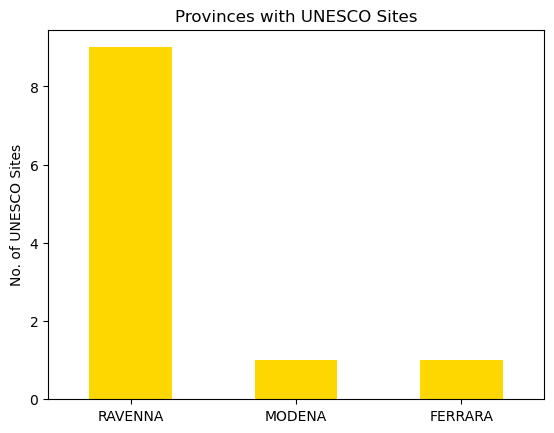

In [21]:
unesco_provinces = EM_ArteCultura.loc[EM_ArteCultura['Sottofamiglia'] == 'PATRIMONIO UNESCO', 'Provincia'].value_counts()
unesco_provinces.plot(title= 'Provinces with UNESCO Sites', 
                      kind='bar',
                      color='gold',
                      rot=0)
plt.ylabel("No. of UNESCO Sites")

Not only can you see from this visualisation that only three of the nine provinces in this region host UNESCO sites, but above all that Ravenna hosts no less than nine of a total of 11. 

### Further insights

I also found a dataset on culinary culture.

In [22]:
EM_Enogastronomia = pd.read_csv('/Users/lisaraulli/Downloads/Regione-Emilia-Romagna---Enogastronomia-i-luoghi-del-gusto.csv', 
                                sep=';', quotechar='"', encoding="ISO-8859-1") #engine='python', on_bad_lines='skip'

In [23]:
EM_Enogastronomia.head(10)

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
0,PIACENZA,PIACENZA,ASSOCIAZIONE STRADA DEI VINI E DEI SAPORI DEI ...,Associazione per la promozione del Turismo Eno...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ASSOCIAZIONE STRADA DEI VINI E DEI SAPORI DEI ...,"c/o CTS Piazza Cavalli 7, 29121 - Piacenza (PC)",NaN,Piacenza,42184,45.052969,9.693546
1,PIACENZA,PIACENZA,ASSOCIAZIONE STRADA DEL PO E DEI SAPORI DELLA ...,Associazione per la promozione del Turismo Eno...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ASSOCIAZIONE STRADA DEL PO E DEI SAPORI DELLA ...,"c/o CTS Piazza Cavalli, 7 - Piacenza (PC)",NaN,Piacenza,42184,45.052969,9.693546
2,PIACENZA,PIACENZA,CONSORZIO SALUMI DOP PIACENTINI,"Il Consorzio tutela, promuove e valorizza la d...",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CONSORZIO SALUMI DOP PIACENTINI,"Via Cristoforo Colombo, 35 - Piacenza (PC)",NaN,Piacenza,42184,NaN,NaN
3,PIACENZA,PIACENZA,CONSORZIO SALUMI TIPICI PIACENTINI,Consorzio per la valorizzazione e la diffusion...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CONSORZIO SALUMI TIPICI PIACENTINI,"c/o Palazzo dell'Agricoltura - via Colombo, 35...",NaN,Piacenza,42184,45.052969,9.693546
4,PIACENZA,PIACENZA,CONSORZIO TUTELA GRANA PADANO,Il Consorzio di tutela del Grana Padano promuo...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CONSORZIO TUTELA GRANA PADANO,Piacenza (PC),NaN,Piacenza,42184,NaN,NaN
5,PIACENZA,PIACENZA,CONSORZIO TUTELA PROVOLONE VALPADANA,Il Consorzio ha il compito di tutelate e vigil...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CONSORZIO TUTELA PROVOLONE VALPADANA,Piacenza (PC),NaN,Piacenza,42184,NaN,NaN
6,PIACENZA,PIACENZA,CONSORZIO VINI DOC COLLI PIACENTINI,Il Consorzio di tutela dei Vini D.O.C. Colli p...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CONSORZIO VINI DOC COLLI PIACENTINI,"Strada Valnure, 3 - Piacenza (PC)",NaN,Piacenza,42184,NaN,NaN
7,BORGO VAL DI TARO,PARMA,Consorzio Fungo di Borgotaro,Il Consorzio per la tutela dell'Indicazione Ge...,http://www.turismo.comune.parma.it/it/canali-t...,http://www.turismo.comune.parma.it/it/canali-t...,Consorzio Fungo di Borgotaro,"Via Nazionale, 54 - 43043 - Borgo Val di Taro ...",NaN,Parma,42132,NaN,NaN
8,COLLECCHIO,PARMA,Museo della Pasta,Presso la stupenda corte agricola medievale di...,http://www.turismo.comune.parma.it/it/canali-t...,http://www.turismo.comune.parma.it/it/canali-t...,Museo della Pasta,"Corte di Giarola, Strada Giarola, 11 - 43044 -...",NaN,Parma,42132,NaN,NaN
9,COLLECCHIO,PARMA,Museo del Pomodoro,"Di origine americana, il pomodoro ha trovato p...",http://www.turismo.comune.parma.it/it/canali-t...,http://www.turismo.comune.parma.it/it/canali-t...,Museo del Pomodoro,"Corte di Giarola, Strada Giarola, 11 - 43044 -...",NaN,Parma,42132,NaN,NaN


It might be interesting to combine the two data frames (artistic and culinary culture) on the basis of latitude and longitude and draw interesting tourist information from it. 
- For it to be a union with meaning, I consider it necessary to delete rows that have null values in the latitude and longitude columns using the function `dropna()`.
- After that passage, I proceeded with the actual merging: `pd.merge()`

In [24]:
EM_Turismo = EM_ArteCultura.dropna(subset=['Longitudine', 'Latitudine'])\
.merge(EM_Enogastronomia.dropna(subset=['Longitudine', 'Latitudine']), on=['Longitudine', 'Latitudine'])

EM_Turismo.head()

,Comune_x,Provincia_x,Nome_x,Descrizione_x,Scheda_x,Immagine_x,Descrizione immagine_x,Sottofamiglia,Indirizzo_x,Localita_x,...,Provincia_y,Nome_y,Descrizione_y,Scheda_y,Immagine_y,Descrizione immagine_y,Indirizzo_y,Localita_y,Redazione locale_y,Data di esportazione_y
0,FRASSINORO,MODENA,Borgo Case Farioli - Fontanaluccia,Da segnalare un voltone con un passaggio comun...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,BORGHI,Frassinoro,NaN,...,MODENA,Cooperativa Sociale San Rocco,La Cooperativa Sociale S. Rocco nasce nel sett...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Macchiaccia, 1 - 41045 Frassinoro MO",NaN,Appennino Modenese,42128
1,FRASSINORO,MODENA,Borgo di Rovolo,Il borgo risalente al XIII - XIV secolo contie...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,BORGHI,Frassinoro,NaN,...,MODENA,Cooperativa Sociale San Rocco,La Cooperativa Sociale S. Rocco nasce nel sett...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Macchiaccia, 1 - 41045 Frassinoro MO",NaN,Appennino Modenese,42128
2,FRASSINORO,MODENA,Chiesa di San Lorenzo - Cargedolo,Fu edificata nel 1861 per conto della famiglia...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"CHIESE, PIEVI, BATTISTERI",Frassinoro,NaN,...,MODENA,Cooperativa Sociale San Rocco,La Cooperativa Sociale S. Rocco nasce nel sett...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Macchiaccia, 1 - 41045 Frassinoro MO",NaN,Appennino Modenese,42128
3,FRASSINORO,MODENA,Chiesa di S.Lucia - Fontanaluccia,Fu eretta intorno al 1833 per sostituire la ch...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"CHIESE, PIEVI, BATTISTERI",Frassinoro,NaN,...,MODENA,Cooperativa Sociale San Rocco,La Cooperativa Sociale S. Rocco nasce nel sett...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Macchiaccia, 1 - 41045 Frassinoro MO",NaN,Appennino Modenese,42128
4,FRASSINORO,MODENA,Mulino del Fante- Piandelagotti,Questo edificio del Sei - Settecento conserva ...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"CASE COLONICHE, MULINI",via mulino del fante - 41044 Frassinoro MO,NaN,...,MODENA,Cooperativa Sociale San Rocco,La Cooperativa Sociale S. Rocco nasce nel sett...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Macchiaccia, 1 - 41045 Frassinoro MO",NaN,Appennino Modenese,42128


The merging of the datasets has created columns duplicates, I will proceed to remove them.

In [25]:
EM_Turismo.drop(['Comune_y',
                 'Provincia_y'], axis=1, inplace=True)

In [26]:
EM_Turismo.columns

Index(['Comune_x', 'Provincia_x', 'Nome_x', 'Descrizione_x', 'Scheda_x',
       'Immagine_x', 'Descrizione immagine_x', 'Sottofamiglia', 'Indirizzo_x',
       'Localita_x', 'Redazione locale_x', 'Data di esportazione_x',
       'Latitudine', 'Longitudine', 'Nome_y', 'Descrizione_y', 'Scheda_y',
       'Immagine_y', 'Descrizione immagine_y', 'Indirizzo_y', 'Localita_y',
       'Redazione locale_y', 'Data di esportazione_y'],
      dtype='object')

Merging the datasets also created columns with insignificant names, I'll proceed to change them.

In [27]:
EM_Turismo.rename(columns={'Comune_x': 'Comune',
                           'Provincia_x': 'Provincia', 
                           'Nome_x': 'Nome Monumento', 
                           'Descrizione_x': 'Descrizione Monumento',
                           'Scheda_x': 'Scheda Monumento',
                           'Immagine_x': 'Immagine Monumento', 
                           'Descrizione immagine_x': 'Descrizione Immagine monumento',
                           'Indirizzo_x': 'Indirizzo Monumento',
                           'Localita_x': 'Localita Monumento',
                           'Redazione locale_x': 'Redazione Locale monumento', 
                           'Data di esportazione_x': 'Data di Esportazione monumento',
                           'Nome_y': 'Nome Gastronomico', 
                           'Descrizione_y': 'Descrizione Gastronomica',
                           'Scheda_y': 'Scheda Gastronomica',
                           'Immagine_y': 'Immagine Gastronomica', 
                           'Descrizione immagine_y': 'Descrizione Immagine gastronomica', 
                           'Indirizzo_y': 'Indirizzo Gastronomico',
                           'Localita_y': 'Localita Gastronomica',
                           'Redazione locale_y': 'Redazione Locale gastronomica', 
                           'Data di esportazione_y':'Data di Esportazione Gastronomica'}, inplace=True)
EM_Turismo.sample(5)

,Comune,Provincia,Nome Monumento,Descrizione Monumento,Scheda Monumento,Immagine Monumento,Descrizione Immagine monumento,Sottofamiglia,Indirizzo Monumento,Localita Monumento,...,Longitudine,Nome Gastronomico,Descrizione Gastronomica,Scheda Gastronomica,Immagine Gastronomica,Descrizione Immagine gastronomica,Indirizzo Gastronomico,Localita Gastronomica,Redazione Locale gastronomica,Data di Esportazione Gastronomica
90,PRIGNANO SULLA SECCHIA,MODENA,Parco della Pace,"Parco completo di giochi per bambini, servizi ...",http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"GIARDINI, PARCHI STORICI",Centro del paese - 41048 Prignano sulla Secchi...,NaN,...,10.692274,Forno Monti Emanuele,"Specialità: pane, pizza e focaccia. Servizi: b...",http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"via Serramazzoni, 1204 - 41048 Prignano sulla ...",NaN,Appennino Modenese,42128
71,PRIGNANO SULLA SECCHIA,MODENA,Campanile di San Michele,Questa torre romanica si trova al centro di Pr...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"CASTELLI, TORRI, CAMPANILI",Prignano sulla Secchia,NaN,...,10.692274,Apicoltura Castellari Gianni,Produzione e vendita prodotti caseari e tipici...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,"Via Braidella, 15 - 41048 Prignano sulla Secch...",NaN,Appennino Modenese,42128
45,POLINAGO,MODENA,Chiesa dei SS. Ippolito e Cassiano Martiri - C...,Questa chiesa medioevale presenta la facciata ...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Chiesa dei SS. Ippolito e Cassiano Martiri - C...,"CHIESE, PIEVI, BATTISTERI",Corso Roma n. 71 - 41040 Polinago MO,NaN,...,10.721060,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,42128
55,POLINAGO,MODENA,Mulino Veratti - Gombola,Collocato a Gombola non molto lontano dal pont...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Mulino Veratti - Gombola,"CASE COLONICHE, MULINI",Corso Roma n. 71 - 41040 Polinago MO,NaN,...,10.721060,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,42128
37,POLINAGO,MODENA,Casa Contardo Sito 7,Località Casa Contardo; Cronologia: Età del Br...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,SITI ARCHEOLOGICI,Corso Roma n. 71 - 41040 Polinago MO,NaN,...,10.721060,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,42128


I prefer to have the latitude and longitude values next to the Comune and Provincia columns, I will use the `.reindex()` function.

In [28]:
EM_Turismo = EM_Turismo.reindex(columns=['Comune',
                                         'Provincia',
                                         'Latitudine', 
                                         'Longitudine',
                                         'Nome Monumento', 
                                         'Descrizione Monumento',
                                         'Scheda Monumento',
                                         'Immagine Monumento',
                                         'Descrizione Immagine monumento',
                                         'Sottofamiglia',
                                         'Indirizzo Monumento', 
                                         'Localita Monumento',
                                         'Redazione Locale monumento',
                                         'Data di Esportazione monumento',
                                         'Nome Gastronomico',
                                         'Descrizione Gastronomica', 'Scheda Gastronomica',
                                         'Immagine Gastronomica', 'Descrizione Immagine gastronomica',
                                         'Indirizzo Gastronomico', 'Localita Gastronomica',
                                         'Redazione Locale gastronomica',
                                         'Data di Esportazione gastronomica'])

Duplicates were created in the 'Nome Monumento' column from the union of the two dates. I use the `.drop_duplicates` function to delete them. Aware that some data will be lost, however.

In [29]:
EM_Turismo.drop_duplicates(subset='Nome Monumento', keep='first', inplace=True)

Since good food is a great passion of mine, the next time I have to organise an excursion I will rely on a chart showing the destinations with the most gastronomy and monuments recorded.

<AxesSubplot:title={'center':'Best excursion sites'}>

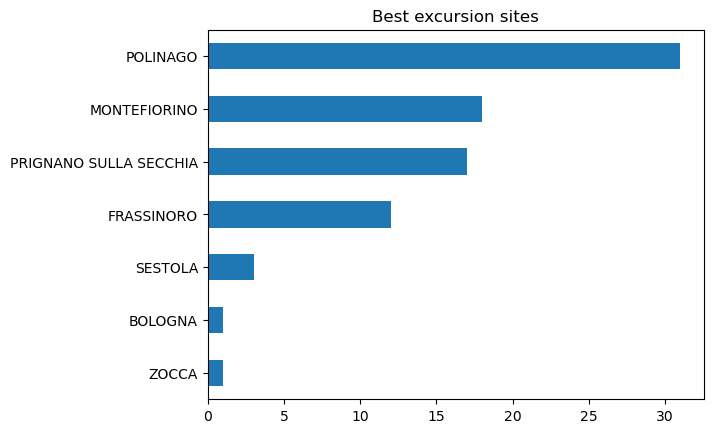

In [30]:
EM_Turismo['Comune'].value_counts().sort_values().plot(title= 'Best excursion sites', kind='barh')


Apparently at 'Polinago' there is a lot to see and good food to eat!

In [31]:
EM_Turismo.loc[EM_Turismo['Comune']=='POLINAGO']

,Comune,Provincia,Latitudine,Longitudine,Nome Monumento,Descrizione Monumento,Scheda Monumento,Immagine Monumento,Descrizione Immagine monumento,Sottofamiglia,...,Data di Esportazione monumento,Nome Gastronomico,Descrizione Gastronomica,Scheda Gastronomica,Immagine Gastronomica,Descrizione Immagine gastronomica,Indirizzo Gastronomico,Localita Gastronomica,Redazione Locale gastronomica,Data di Esportazione gastronomica
32,POLINAGO,MODENA,44.344337,10.72106,Cà del Ghiddo - Gombola,Da segnalare un grande edificio sette-ottocent...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Cà del Ghiddo - Gombola,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
33,POLINAGO,MODENA,44.344337,10.72106,Cà di Messer Polo - Brandola,Questo nucleo presenta la corte pavimentata in...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Cà di Messer Polo - Brandola,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
34,POLINAGO,MODENA,44.344337,10.72106,Cà Nova - Gombola,Questo nucleo rurale settecentesco è costituit...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
35,POLINAGO,MODENA,44.344337,10.72106,Casa Carloni- S. Martino Vallata,E' un nucleo rurale a corte anulare con casa p...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Casa Carloni- S. Martino Vallata,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
36,POLINAGO,MODENA,44.344337,10.72106,Casa Contardo,Località Casa Contardo; Cronologia: Età del Fe...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,SITI ARCHEOLOGICI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
37,POLINAGO,MODENA,44.344337,10.72106,Casa Contardo Sito 7,Località Casa Contardo; Cronologia: Età del Br...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,SITI ARCHEOLOGICI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
38,POLINAGO,MODENA,44.344337,10.72106,Casa Lancellotti- Gombola,Questo nucleo rurale a corte presenta un ampio...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
39,POLINAGO,MODENA,44.344337,10.72106,Casa Marchetti - Brandola,"E' una casa padronale ottocentesca, posta su u...",http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,Appennino Modenese,NaN
40,POLINAGO,MODENA,44.344337,10.72106,Casa Marini,Il complesso residenziale si sviluppa attorno ...,http://www.appenninomodenese.net/ar75/index.cf...,http://www.appennino.provincia.modena.it/ar75/...,Casa Marini,BORGHI,...,42128,Caseifici,CASEIFICIO S. MARIA: Rivendita al pubblico. Vi...,http://www.appenninomodenese.net/ar75/index.cf...,NaN,NaN,Corso Roma n. 71 - 41040 Polinago MO,NaN,App

#### Final Remarks

In fairness, however, I must point out how the EM_ArteCultura dataset could categorise its data better. In fact, although the value on line 1923 with the name 'I Portici di Bologna' is not categorised in the Sottofamiglia == 'PATRIMONIO UNESCO' it does belong there; this is probably because the attribution of this title to the Portici is only two years old. I do not know if others or how many others sites are incorrectly categorised.

In [75]:
#EM_ArteCultura.loc[EM_ArteCultura['Nome'] == "I Portici di Bologna"].replace({'ARCHI, PORTE, MURA, PORTICI' : 'PATRIMONIO UNESCO'})
EM_ArteCultura.iloc[1923] = EM_ArteCultura.iloc[1923].replace({'ARCHI, PORTE, MURA, PORTICI' : 'PATRIMONIO UNESCO'})

In [78]:
EM_ArteCultura.loc[EM_ArteCultura['Sottofamiglia'] == 'PATRIMONIO UNESCO', 'Provincia'].value_counts()

RAVENNA                            9
MODENA                             1
CITTA' METROPOLITANA DI BOLOGNA    1
FERRARA                            1
Name: Provincia, dtype: int64

> **Nonetheless, Ravenna stiil remains the province with the most UNESCO sites!** 

The part concerning tourism is perhaps a bit messy and would certainly deserve further investigation, maybe combining different datasets or with different combinations. Would this also perhaps be adequate to be a part of the individual final project?

In [33]:
#Example of another maybe useful dataset
EM_Mangiare = pd.read_csv('/Users/lisaraulli/Downloads/Regione-Emilia-Romagna---Dove-mangiare.csv',
                          sep=';', quotechar='"', encoding="ISO-8859-1", on_bad_lines='skip')
EM_Mangiare.head()

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Sottofamiglia,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
0,ALSENO,PIACENZA,AGRITURISMO LA RONDANINA,Ambiente esclusivo dove assaporare le gustose ...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,AGRITURISMO LA RONDANINA,"RISTORANTI, PIZZERIE, AGRITURISMI",Via Sandrone 231 - Alseno (PC),NaN,Piacenza,42184,44.873724,9.966273
1,ALSENO,PIACENZA,AGRITURISMO MONTA' DELL'ORTO,"Cucina tipica.Prezzo medio: 30,00 Euro",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,AGRITURISMO MONTA' DELL'ORTO,"RISTORANTI, PIZZERIE, AGRITURISMI",Strada Salsediana 3573 - Alseno (PC),NaN,Piacenza,42184,44.872781,9.974384
2,ALSENO,PIACENZA,RISTORANTE IL COLLE,Ristorante con Pizzeria e PiscinaMercoledi ser...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,RISTORANTE IL COLLE,"RISTORANTI, PIZZERIE, AGRITURISMI",Castelnuovo Fogliani - Alseno (PC),NaN,Piacenza,42184,44.851700,9.950469
3,BESENZONE,PIACENZA,AGRITURISMO LE COLOMBAIE,Un?antica dimora rurale sapientemente restaura...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,AGRITURISMO LE COLOMBAIE,"RISTORANTI, PIZZERIE, AGRITURISMI","Via Bersano, 32, 29010 - Besenzone (PC)",NaN,Piacenza,42184,44.980919,10.015841
4,BESENZONE,PIACENZA,LA FIASCHETTERIA,"Nelle Terre Verdiane, a 1,5 km da Villa Verdi....",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,LA FIASCHETTERIA,"RISTORANTI, PIZZERIE, AGRITURISMI",Via Bersano 59 bis - Besenzone (PC),NaN,Piacenza,42184,44.983575,10.010540


It may also be useful to perhaps combine a dataset containing tourism-related figures or geography data.

In fact, I tried scraping this webpage to get the surface area data and then calculate the proportion of monuments to the surface area. But that's not exactly what I was hoping to achieve. 

In [34]:
import requests 
from bs4 import BeautifulSoup

In [35]:
def Html_transmittor(Link):
    Response = requests.get(Link)
    Html_string1 = Response.text
    return BeautifulSoup(Html_string1, "html.parser")

In [36]:
Html_transmittor('https://www.tuttitalia.it/emilia-romagna/89-province/superficie/').find_all("td", attrs={"class": "cw"})

[<td class="cw">3.702,25</td>,
 <td class="cw">3.447,40</td>,
 <td class="cw">2.687,88</td>,
 <td class="cw">2.627,38</td>,
 <td class="cw">2.585,76</td>,
 <td class="cw">2.378,32</td>,
 <td class="cw">2.291,15</td>,
 <td class="cw">1.859,39</td>,
 <td class="cw">865,01</td>]